In [18]:
import clean_data_svi as cds
import pathlib
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from datetime import timedelta, datetime
from sklearn import preprocessing
from sklearn.decomposition import PCA
from sklearn.mixture import GaussianMixture
import seaborn as sns

In [19]:
SVI_list = []
for i in range(4):
    df = pd.read_csv(f"clean_tables/svi_{i+1}.csv", index_col="date")
    df = df.drop(columns=['Settling_velocity', 'SV_label'])
    df.index = pd.to_datetime(df.index, dayfirst=True)
    SVI_list.append(df)

In [20]:
SVI_list[0]['SVI']

date
2010-01-01     90.943683
2010-01-02     84.365325
2010-01-03     94.541139
2010-01-04     97.402597
2010-01-05    107.937685
                 ...    
2020-12-27    166.666667
2020-12-28    147.453083
2020-12-29    154.702970
2020-12-30    159.722222
2020-12-31    167.597765
Name: SVI, Length: 4018, dtype: float64

In [21]:
svi_tot = SVI_list[0]['SVI']
for i in range(3):
    svi_tot = pd.concat([svi_tot, SVI_list[i+1]['SVI']], axis=1)
svi_tot.columns = ['Reactor1', 'Reactor2','Reactor3','Reactor4']

In [22]:
svi_tot = svi_tot.stack().reset_index()

In [23]:
svi_tot.columns = ['Time', 'Reactor', 'SVI']
svi_tot['Month'] = pd.DatetimeIndex(svi_tot['Time']).month
svi_tot['Year'] = pd.DatetimeIndex(svi_tot['Time']).year

In [24]:
svi_tot

,Time,Reactor,SVI,Month,Year
0,2010-01-01,Reactor1,90.943683,1,2010
1,2010-01-01,Reactor2,88.649852,1,2010
2,2010-01-01,Reactor3,94.066570,1,2010
3,2010-01-01,Reactor4,87.904360,1,2010
4,2010-01-02,Reactor1,84.365325,1,2010
...,...,...,...,...,...
16067,2020-12-30,Reactor4,137.157107,12,2020
16068,2020-12-31,Reactor1,167.597765,12,2020
16069,2020-12-31,Reactor2,152.777778,12,2020
16070,2020-12-31,Reactor3,147.453083,12,2020


(14610.0, 18627.0)

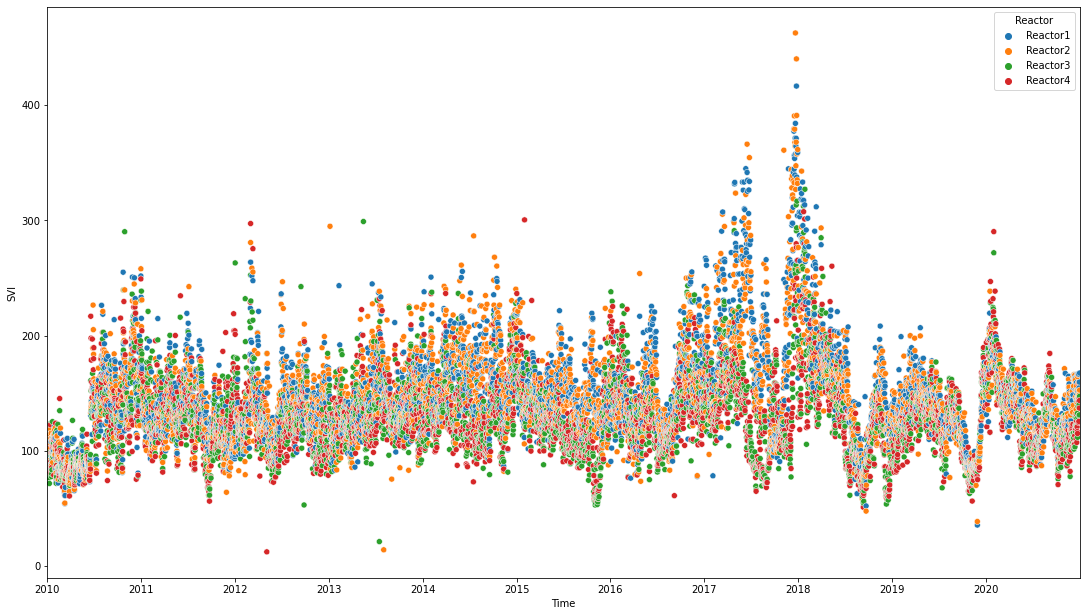

In [25]:
fig, ax = plt.subplots()
fig.set_size_inches(18.5, 10.5)
g = sns.scatterplot(data=svi_tot, x="Time", y="SVI", hue="Reactor", ax=ax)
plt.xlim(svi_tot['Time'].min(), svi_tot['Time'].max())

Text(0.5, 1.0, 'SVI')

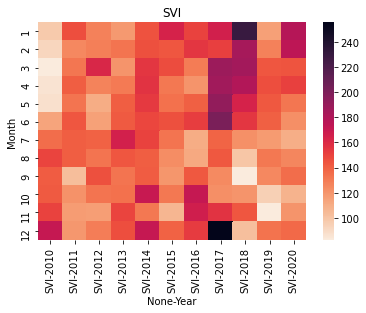

In [26]:
table = pd.pivot_table(svi_tot, values=['SVI'], index=['Month'], columns=['Year'])
ax = sns.heatmap(table, cmap="rocket_r")
plt.title(svi_tot.columns[2])

In [27]:
temp_df = pd.read_csv("clean_tables/temperatur.csv", index_col="date")
temp_df.index = pd.to_datetime(temp_df.index, dayfirst=True)
sludge_age_df = pd.read_csv("clean_tables/sludge_age_f_m.csv", index_col="date")
sludge_age_df.index = pd.to_datetime(sludge_age_df.index, dayfirst=True)

In [28]:
temp_df

,Temperature
date,
2010-01-01,22.030
2010-01-02,21.985
2010-01-03,21.740
2010-01-04,21.815
2010-01-05,21.890
...,...
2020-12-27,22.540
2020-12-28,22.535
2020-12-29,22.660


In [29]:
sludge_age_df

,F_M - A,F_M - B,Sludge Age - A,Sludge Age - B
date,,,,
2010-01-01,0.23,0.22,3.44,2.92
2010-01-02,0.18,0.22,3.78,3.04
2010-01-03,0.21,0.22,3.82,3.00
2010-01-04,0.21,0.22,3.40,2.97
2010-01-05,0.23,0.23,3.70,2.94
...,...,...,...,...
2020-12-27,0.25,0.23,2.75,3.41
2020-12-28,0.26,0.24,2.91,3.10
2020-12-29,0.26,0.25,2.82,3.15


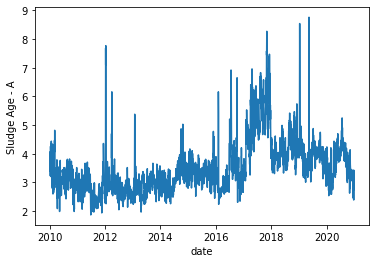

In [30]:
_=sns.lineplot(data = sludge_age_df[0:], x="date", y="Sludge Age - A")
_=sns.lineplot(data = SVI_list[0]['SVI'], ax=ax.twinx())
plt.show()

In [43]:
reactor_list = []
for i in range(4):
    join = pd.concat([SVI_list[i]['SVI'], temp_df], axis=1)
    if i <=1:
        join = pd.concat([join, sludge_age_df.iloc[:, np.r_[0, 2]]], axis=1)
    else:
        join = pd.concat([join, sludge_age_df.iloc[:, np.r_[1, 3]]], axis=1)
    reactor_list.append(join)

In [44]:
reactor_list[3]

,SVI,Temperature,F_M - B,Sludge Age - B
date,,,,
2010-01-01,87.904360,22.030,0.22,2.92
2010-01-02,106.039326,21.985,0.22,3.04
2010-01-03,83.333333,21.740,0.22,3.00
2010-01-04,102.176966,21.815,0.22,2.97
2010-01-05,106.995885,21.890,0.23,2.94
...,...,...,...,...
2020-12-27,143.229167,22.540,0.23,3.41
2020-12-28,125.628141,22.535,0.24,3.10
2020-12-29,145.939086,22.660,0.25,3.15


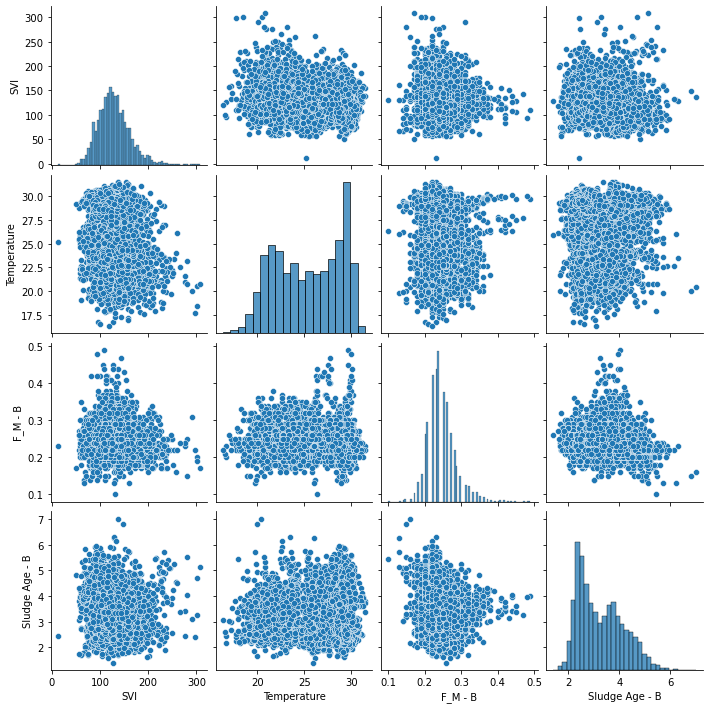

In [46]:
_=sns.pairplot(reactor_list[3], diag_kind="hist")

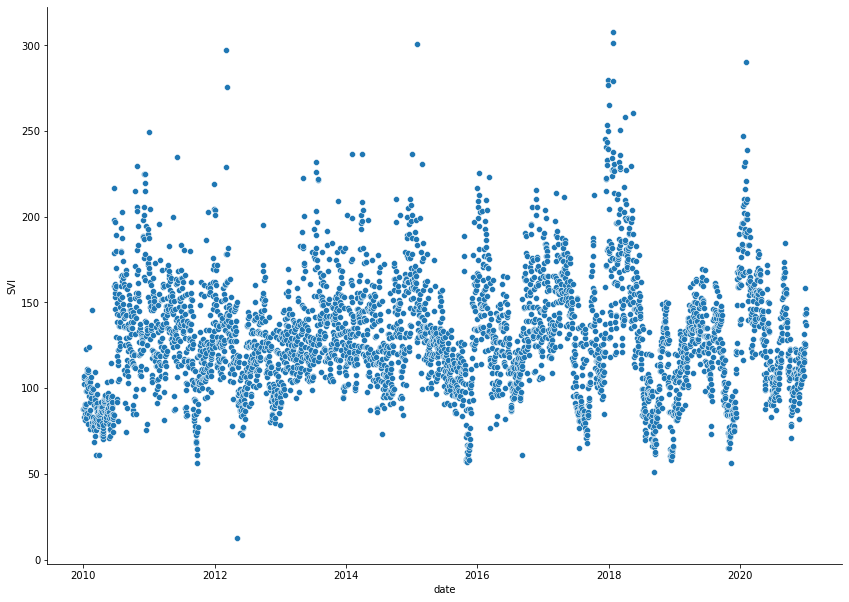

In [47]:
sns.relplot(x="date", y="SVI", data=reactor_list[3], height=8.27, aspect=11.7/8.27)

In [33]:
corr = reactor_list[0].corr(method='pearson')

In [34]:
corr

,SVI,Temperature,F_M - A,Sludge Age - A
SVI,1.000000,-0.052599,-0.006066,0.206780
Temperature,-0.052599,1.000000,-0.066967,0.101081
F_M - A,-0.006066,-0.066967,1.000000,-0.089459
Sludge Age - A,0.206780,0.101081,-0.089459,1.000000


In [9]:
label_dict = {'bad':0, "reasonable":1, 'good':2}
for i in range(4):
    reactor_list[i].columns = ['SVI', 'SVI_label', 'Temperature', 'F_M', 'Sludge Age']
    reactor_list[i]= reactor_list[i].replace({'SVI_label': label_dict})

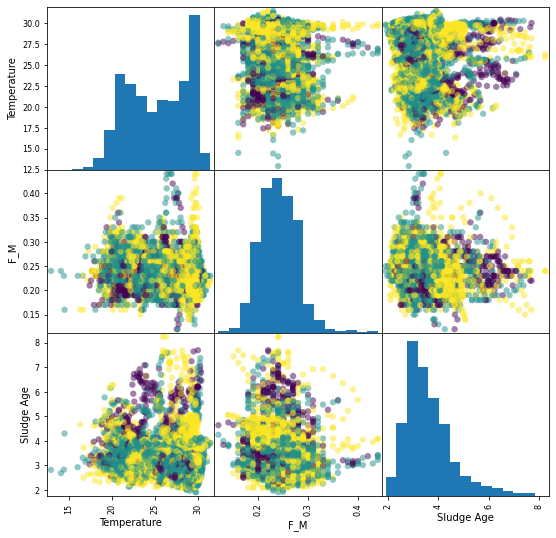

In [10]:
x = reactor_list[0][['Temperature', 'F_M', 'Sludge Age']]
y = reactor_list[0]['SVI_label']
scatter = pd.plotting.scatter_matrix(x, c=y, marker='o', s=40, hist_kwds={'bins': 15}, figsize=(9,9))

In [14]:
model = PCA(n_components=2)

X_reactor3 = reactor_list[2].drop('SVI_label', axis=1)  # drop the labels of the data

model.fit(X_reactor3)  # notice how the labels aren't specified
X_2D = model.transform(X_reactor3)  # turn the data into a 2D np.ndarray
data_dict = dict(PCA1=X_2D[:, 0], PCA2=X_2D[:, 1], SVI_label=reactor_list[2]['SVI_label'])
df_PCA = pd.DataFrame(data_dict)

In [15]:
df_PCA.drop('SVI_label', axis=1)

,PCA1,PCA2
date,,
2010-01-01,-36.375211,4.306545
2010-01-02,-35.122161,4.317441
2010-01-03,-47.602991,4.902043
2010-01-04,-35.128478,4.487594
2010-01-05,-36.507249,4.451370
...,...,...
2020-09-11,24.364261,-6.839140
2020-09-12,22.457376,-6.552276
2020-09-13,33.119457,-6.697430


<AxesSubplot:xlabel='PCA1', ylabel='PCA2'>

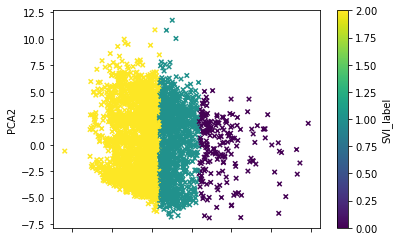

In [16]:
df_PCA.plot.scatter(x='PCA1', y='PCA2', c='SVI_label', marker='x', cmap='viridis')

In [17]:
model = GaussianMixture(n_components=3, covariance_type='full')
model.fit(X_reactor3)  # again, no labels are given
y_gmm = model.predict(X_reactor3)

<AxesSubplot:xlabel='PCA1', ylabel='PCA2'>

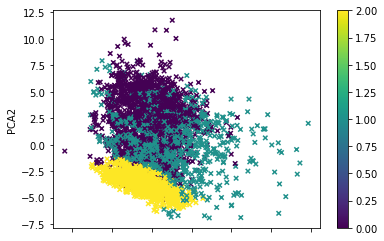

In [18]:
df_PCA.plot.scatter(x='PCA1', y='PCA2', c=y_gmm, marker='x', cmap='viridis')